In [1]:
# LeNet-5로 MNIST 인식하기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# 데이터 준비
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 모델 선택(신경망 구조 설계)
cnn = Sequential()
cnn.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))
cnn.add(Conv2D(16, kernel_size=(5, 5), padding='valid', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))
cnn.add(Conv2D(120, kernel_size=(5, 5), padding='valid', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=84, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

# 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=2)   # verbose=2: 학습 진행 상황을 보여줌

# 예측(성능 측정)
res = cnn.evaluate(x_test, y_test, verbose=0)
print('Accuracy =', res[1]*100)

Epoch 1/10
469/469 - 11s - loss: 0.3098 - accuracy: 0.9081 - val_loss: 0.0896 - val_accuracy: 0.9707 - 11s/epoch - 23ms/step
Epoch 2/10
469/469 - 3s - loss: 0.0817 - accuracy: 0.9750 - val_loss: 0.0517 - val_accuracy: 0.9829 - 3s/epoch - 6ms/step
Epoch 3/10
469/469 - 3s - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0418 - val_accuracy: 0.9852 - 3s/epoch - 6ms/step
Epoch 4/10
469/469 - 3s - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0396 - val_accuracy: 0.9861 - 3s/epoch - 6ms/step
Epoch 5/10
469/469 - 3s - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0319 - val_accuracy: 0.9896 - 3s/epoch - 6ms/step
Epoch 6/10
469/469 - 3s - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0312 - val_accuracy: 0.9891 - 3s/epoch - 6ms/step
Epoch 7/10
469/469 - 3s - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0339 - val_accuracy: 0.9885 - 3s/epoch - 5ms/step
Epoch 8/10
469/469 - 3s - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0326 - val_accuracy: 0.9895 - 3s/epoch - 6ms/step
Epoch 9/10
469/469 - 

Epoch 1/10
391/391 - 11s - loss: 1.6277 - accuracy: 0.3995 - val_loss: 1.2983 - val_accuracy: 0.5317 - 11s/epoch - 27ms/step
Epoch 2/10
391/391 - 5s - loss: 1.2564 - accuracy: 0.5518 - val_loss: 1.1026 - val_accuracy: 0.6067 - 5s/epoch - 13ms/step
Epoch 3/10
391/391 - 5s - loss: 1.0842 - accuracy: 0.6150 - val_loss: 0.9378 - val_accuracy: 0.6664 - 5s/epoch - 13ms/step
Epoch 4/10
391/391 - 5s - loss: 0.9676 - accuracy: 0.6595 - val_loss: 0.8791 - val_accuracy: 0.6976 - 5s/epoch - 13ms/step
Epoch 5/10
391/391 - 5s - loss: 0.8849 - accuracy: 0.6898 - val_loss: 0.8372 - val_accuracy: 0.7067 - 5s/epoch - 13ms/step
Epoch 6/10
391/391 - 5s - loss: 0.8220 - accuracy: 0.7124 - val_loss: 0.7398 - val_accuracy: 0.7435 - 5s/epoch - 13ms/step
Epoch 7/10
391/391 - 5s - loss: 0.7672 - accuracy: 0.7304 - val_loss: 0.7480 - val_accuracy: 0.7384 - 5s/epoch - 13ms/step
Epoch 8/10
391/391 - 5s - loss: 0.7323 - accuracy: 0.7431 - val_loss: 0.7022 - val_accuracy: 0.7582 - 5s/epoch - 13ms/step
Epoch 9/10
391

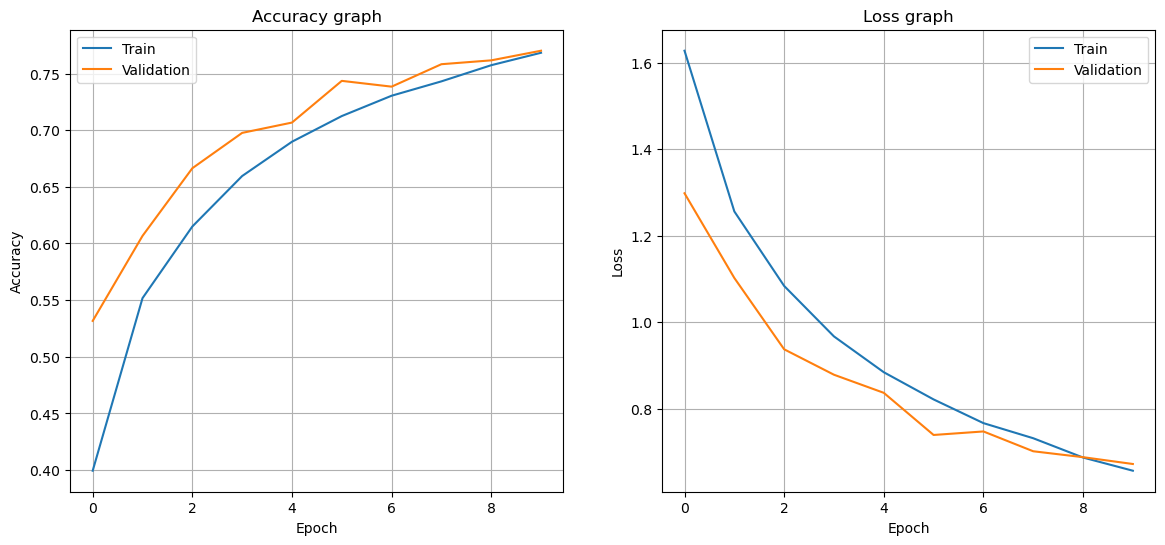

In [1]:
# 컨볼루션 신경망으로 자연 영상 인식하기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=2)

res = cnn.evaluate(x_test, y_test, verbose=0)
print('Accuracy =', res[1]*100)

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

In [4]:
# 필기 숫자 인식기 성능 향상하기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_test, y_test), verbose=2)

cnn.save('cnn_v2.h5')

res = cnn.evaluate(x_test, y_test, verbose=0)
print('Accuracy =', res[1]*100)

Epoch 1/15
469/469 - 7s - loss: 0.2159 - accuracy: 0.9316 - val_loss: 0.0408 - val_accuracy: 0.9872 - 7s/epoch - 15ms/step
Epoch 2/15
469/469 - 5s - loss: 0.0618 - accuracy: 0.9810 - val_loss: 0.0263 - val_accuracy: 0.9908 - 5s/epoch - 11ms/step
Epoch 3/15
469/469 - 5s - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0245 - val_accuracy: 0.9920 - 5s/epoch - 11ms/step
Epoch 4/15
469/469 - 5s - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0193 - val_accuracy: 0.9932 - 5s/epoch - 11ms/step
Epoch 5/15
469/469 - 5s - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0225 - val_accuracy: 0.9930 - 5s/epoch - 11ms/step
Epoch 6/15
469/469 - 5s - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0199 - val_accuracy: 0.9938 - 5s/epoch - 11ms/step
Epoch 7/15
469/469 - 5s - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0195 - val_accuracy: 0.9936 - 5s/epoch - 11ms/step
Epoch 8/15
469/469 - 5s - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0206 - val_accuracy: 0.9935 - 5s/epoch - 11ms/step
Epoch 9/15
469/4

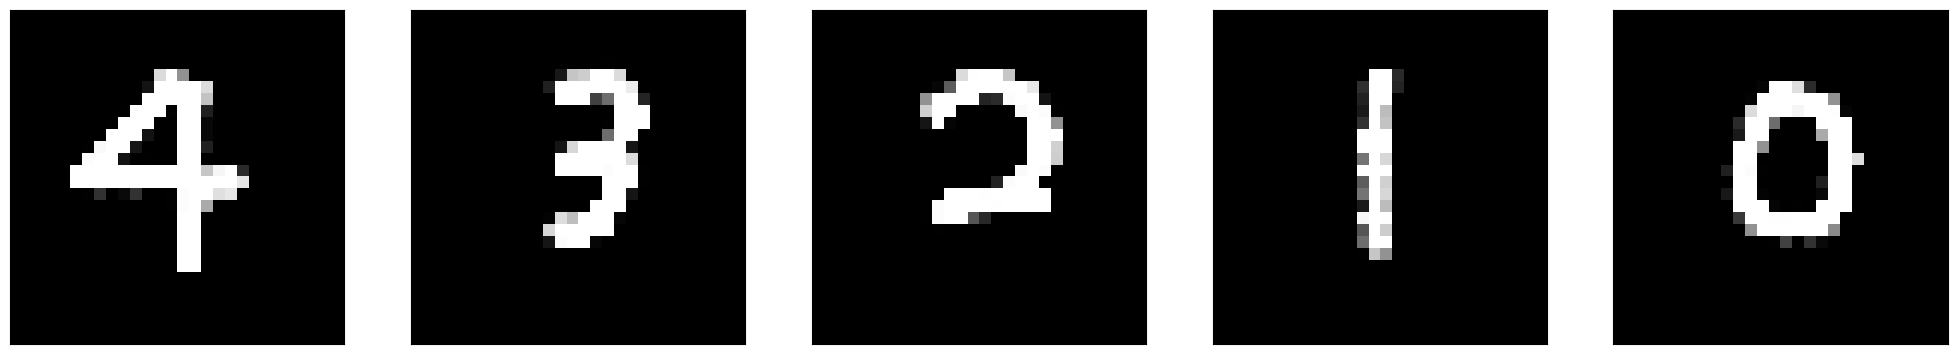

1/1 [==============================] - 0s 36ms/step


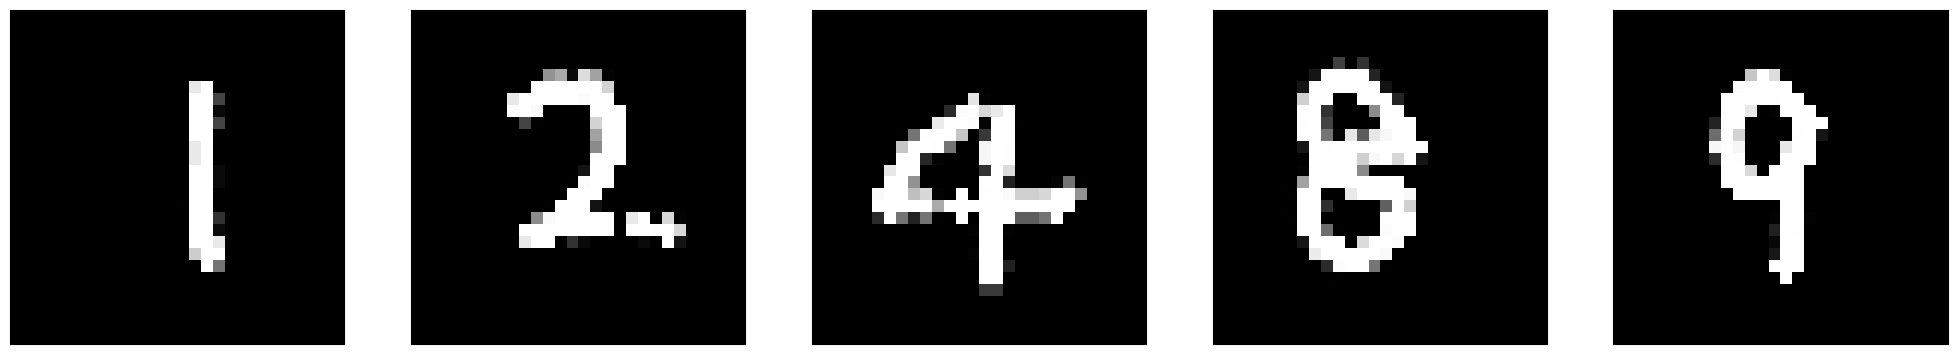

1/1 [==============================] - 0s 32ms/step


In [1]:
# 우편번호 인식기 v.2(CNN 버전)
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
import winsound

model = tf.keras.models.load_model('cnn_v2.h5')

def reset():
    global img
       
    img = np.ones((200,520,3), dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img, (10+i*100,50), (10+(i+1)*100,150), (0,0,255))
    cv.putText(img, 'e:erase s:show r:recognition q:quit', (10,40), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 1)

def grab_numerals():
    numerals=[]
    for i in range(5):
        roi = img[51:149, 11+i*100:9+(i+1)*100, 0]
        roi = 255 - cv.resize(roi, (28,28), interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    numerals = np.array(numerals)
    return numerals

def show():
    numerals = grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(numerals[i], cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
def recognition():
    numerals = grab_numerals()
    numerals = numerals.reshape(5, 28, 28, 1)
    numerals = numerals.astype(np.float32)/255.0
    res = model.predict(numerals)   # 신경망 모델로 예측
    class_id = np.argmax(res, axis=1)
    for i in range(5):
        cv.putText(img, str(class_id[i]), (50+i*100,180), cv.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 1)
    winsound.Beep(1000, 500)         # 비프음 발생
        
BrushSiz = 4
LColor = (0,0,0)

def writing(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x,y), BrushSiz, LColor, -1) 
    elif event == cv.EVENT_MOUSEMOVE and flags == cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img, (x,y), BrushSiz, LColor, -1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing', writing)

while(True):
    cv.imshow('Writing', img)
    key = cv.waitKey(1)
    if key == ord('e'):
        reset()
    elif key == ord('s'):
        show()
    elif key == ord('r'):
        recognition()
    elif key == ord('q'):
        break

cv.destroyAllWindows()

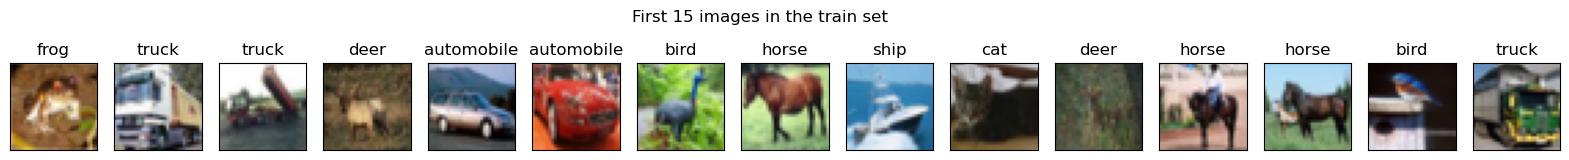

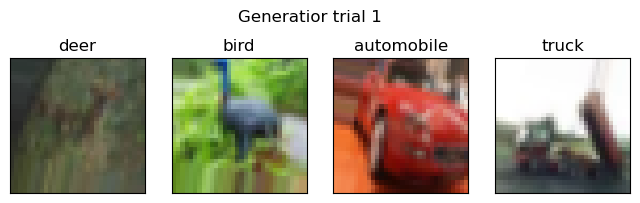

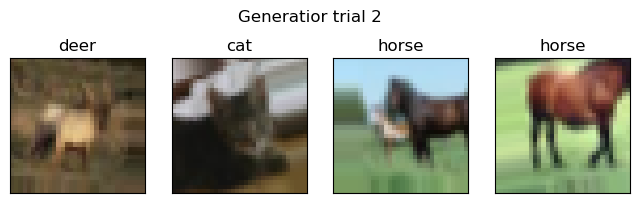

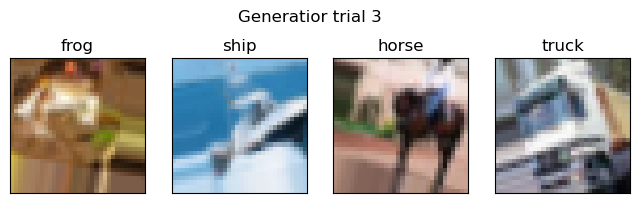

In [7]:
# 증강된 영상 확인하기
#import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_train = x_train[0:15,]; y_train = y_train[0:15,]      # 앞 15개에 대해서만 증대 적용
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 2))
plt.suptitle("First 15 images in the train set")
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])
plt.show()

batch_siz = 4
generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
gen = generator.flow(x_train, y_train, batch_size=batch_siz)

for a in range(3):
    img, label = gen.next()
    plt.figure(figsize=(8, 2.4))
    plt.suptitle("Generatior trial " + str(a+1))
    for i in range(batch_siz):
        plt.subplot(1, batch_siz, i+1)
        plt.imshow(img[i])
        plt.xticks([]); plt.yticks([])
        plt.title(class_names[int(label[i])])
    plt.show()

In [16]:
# ResNet50으로 자연 영상 인식하기
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img = cv.imread('rabbit.jpg')
x = np.reshape(cv.resize(img, (224, 224)), (1, 224, 224, 3))    # (batch, height, width, channel)
x = preprocess_input(x)

preds = model.predict(x)
top5 = decode_predictions(preds, top=5)[0]
print("Predictions: ", top5)

for i in range(5):
    cv.putText(img, top5[i][1]+':'+str(top5[i][2]), (10, 200+i*20),      # img, text, position, font, font size, color, thickness
               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)

cv.imshow('Recognition result', img)

cv.waitKey()
cv.destroyAllWindows()

1/1 [==============================] - 1s 914ms/step
Predictions:  [('n02325366', 'wood_rabbit', 0.7426901), ('n02326432', 'hare', 0.24030925), ('n02328150', 'Angora', 0.008802496), ('n01877812', 'wallaby', 0.0026928762), ('n02356798', 'fox_squirrel', 0.0012293282)]


In [1]:
# DenseNet121로 견종 인식하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib

data_path = pathlib.Path('datasets/stanford_dogs/images/images')

train_ds = image_dataset_from_directory(data_path, validation_split=0.2, subset='training',
                                        seed=123, image_size=(224, 224), batch_size=16)
test_ds = image_dataset_from_directory(data_path, validation_split=0.2, subset='validation',
                                        seed=123, image_size=(224, 224), batch_size=16)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
cnn = Sequential()
cnn.add(Rescaling(1.0/255.0))
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(units=1024, activation='relu'))
cnn.add(Dropout(0.75))
cnn.add(Dense(units=120, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.000001), metrics=['accuracy'])
hist = cnn.fit(train_ds, validation_data=test_ds, epochs=200, verbose=2)

print("Accuracy =", cnn.evaluate(test_ds, verbose=0)[1]*100)

cnn.save('cnn_for_stanford_dogs.h5')        # 미세 조정된 모델을 파일에 저장

import pickle
f = open('dog_species_names.txt', 'wb')
pickle.dump(train_ds.class_names, f)
f.close()

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
Epoch 1/200


KeyboardInterrupt: 

> 위의 코드는 실행하기 위해 충분한 컴퓨팅 자원이 요구되며, 시간이 오래 걸리기에 첨부된 파일로 대체한다.

In [1]:
# 견종 인식 프로그램 구현하기
import cv2 as cv
import numpy as np
import tensorflow as tf
import winsound
import pickle
import sys
from PyQt5.QtWidgets import *

cnn = tf.keras.models.load_model('cnn_for_stanford_dogs.h5')    # 미세 조정된 모델 로드
dog_species = pickle.load(open('dog_species_names.txt', 'rb'))  # 견종 이름 로드

class DogSpeciesRecognition(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('Dog Species Recognition')
        self.setGeometry(200, 200, 700, 100)        # x, y, width, height

        fileButton = QPushButton('Open File', self)
        recognitionButton = QPushButton('Recognition', self)
        quitButton = QPushButton('Quit', self)

        fileButton.setGeometry(10, 10, 100, 30)
        recognitionButton.setGeometry(110, 10, 100, 30)
        quitButton.setGeometry(510, 10, 100, 30)

        fileButton.clicked.connect(self.pictureOpenFunction)
        recognitionButton.clicked.connect(self.recognitionFunction)
        quitButton.clicked.connect(self.quitFunction)

    # def pictureOpenFunction(self):
    #     fname = QFileDialog.getOpenFileName(self, 'Read File', './')
    #     self.img = cv.imread(fname[0])
    #     if self.img is None:
    #         sys.exit('File not found')

    #     cv.imshow('Dog image', self.img)

    def pictureOpenFunction(self):
        fname = QFileDialog.getOpenFileName(self, 'Read File', './')
        if fname[0]:  # 파일이 선택되었는지 확인
            self.img = cv.imread(fname[0])
            print("Selected file:", fname[0])
            if self.img is None:
                QMessageBox.critical(self, "Error", "Failed to load the image.")
            else:
                cv.imshow('Dog image', self.img)
        else:
            print("No file selected")

    def recognitionFunction(self):
        x = np.reshape(cv.resize(self.img, (224, 224)), (1, 224, 224, 3))
        res = cnn.predict(x)[0]
        top5 = np.argsort(-res)[:5]
        top5_dog_species_names = [dog_species[i] for i in top5]
        for i in range(5):
            prob = '('+str(res[top5[i]]*100)+')'
            name = str(top5_dog_species_names[i]).split('-')[1]
            cv.putText(self.img, prob+name, (10,100+i*30), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
        cv.imshow('Dog image', self.img)
        winsound.Beep(1000, 500)

    def quitFunction(self):
        cv.destroyAllWindows()
        self.close()

app = QApplication(sys.argv)
win = DogSpeciesRecognition()
win.show()
app.exec_()

Selected file: C:/Users/prohe/OneDrive/Desktop/github_manage/study/CV_and_DL/ch8/rabbit.jpg
1/1 [==============================] - 7s 7s/step


0